# An introduction to Pandas

[pandas](http://pandas.pydata.org) is a module which allows the construction of a *dataframe*, this is an object to store data that looks a little like a spreadsheet (the data is indexed principally by a column name and row name/number). It also includes functions designed to make working with this structured or tabular data fast and easy.  

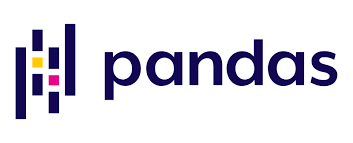

Again, the website for Pandas is good and contains the main set of documentation. It is a harder module to understand, and the documentation on the website is more dense to read. [Here](http://pandas.pydata.org/index.html) is the main website. 
- The main documentation for Pandas is [here](http://pandas.pydata.org/pandas-docs/stable/).
- There is a quick introduction to Pandas [here](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- There is a fantastic tutorial (also in Jupyter) [here](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) (under Lessons for New Pandas Users). This is well worth working through a little if you want a longer introduction to the basic concepts in Pandas.

Here are some basic examples to getting started with pandas, the datasets we use need to be copied into the same location as this notebook in order to use them in our code. 

In [1]:
# Common pandas import statement
import pandas as pd

# Some other related necessary packages to import most of the time 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

# Creating a DataFrame with random data
data = np.random.rand(5, 3)
df = pd.DataFrame(data, columns=['A', 'B', 'C'])
print(df)

          A         B         C
0  0.941448  0.642557  0.263331
1  0.056967  0.399789  0.021823
2  0.790075  0.693526  0.475417
3  0.215275  0.084278  0.700621
4  0.079142  0.589419  0.310219


## Removing columns/indices <a name="removing"></a>
Similar to above, it is easy to remove entries. This is done with the `drop()` method and can be applied to both columns and indices:

In [4]:
# define new DataFrame using a function from NumPy (don't worry about what this line does just now)
data = np.reshape(np.arange(9), (3,3))

df = pd.DataFrame(data, index=['a','b','c'],
                  columns=['Edinburgh', 'Glasgow', 'Dundee'])
print(df)

   Edinburgh  Glasgow  Dundee
a          0        1       2
b          3        4       5
c          6        7       8


In [5]:
df.drop('b')  # remove row (index)~

,Edinburgh,Glasgow,Dundee
a,0,1,2
c,6,7,8


In [6]:
# You can also drop from a column - here is the way we would drop two columns:
df.drop(['Dundee', 'Glasgow'], axis='columns')

,Edinburgh
a,0
b,3
c,6


Note that the original data frame is unchanged: `df.drop()` gives us a new data frame with the desired data dropped, and leaves the original data intact. We can ask `.drop()` to operate directly on the original data frame by setting the argument `inplace=True`.

In [7]:
# Original data frame that we created
print(df)

# Dropping the row called a and updating the df using "inplace=True"
df.drop('a', inplace=True)
print('-----')
print(df)

   Edinburgh  Glasgow  Dundee
a          0        1       2
b          3        4       5
c          6        7       8
-----
   Edinburgh  Glasgow  Dundee
b          3        4       5
c          6        7       8


## Indexing

Rows and columns in a dataframe can be referred to by name (if they are given a name - for the example at the beginning using oil reserves we didn't specify row names), or by row/column number. 

**Important Note** - python starts counting from 0, i.e. 0, 1, 2, ... as indexing, not starts from 1 !

In [8]:
df = pd.DataFrame(data, index=['a','b','c'],
                  columns=['Edinburgh', 'Glasgow', 'Dundee'])
print(df)

   Edinburgh  Glasgow  Dundee
a          0        1       2
b          3        4       5
c          6        7       8


We can get the 'a' row by name or by knowing that it is row 0 using the following two pandas functions:

In [9]:
# Note where the square brackets are!
print(df.loc['a'])
print('-----')
print(df.iloc[0])

Edinburgh    0
Glasgow      1
Dundee       2
Name: a, dtype: int64
-----
Edinburgh    0
Glasgow      1
Dundee       2
Name: a, dtype: int64


We can also grab two rows at a time by listing them

In [10]:
# Again note where the square brackets are!
print(df.loc[['a','b']])
print('-----')
print(df.iloc[[0,1]])

   Edinburgh  Glasgow  Dundee
a          0        1       2
b          3        4       5
-----
   Edinburgh  Glasgow  Dundee
a          0        1       2
b          3        4       5


Likewise we can do similar things with **column names** and **numbers** and **multiple column names and numbers** 
- Here all in one go:

In [11]:
print(df['Edinburgh'])
print('-----')

print(df.iloc[:,0])
print('=====')

print(df[['Edinburgh','Dundee']])
print('-----')

print(df.iloc[:,[0,2]])

a    0
b    3
c    6
Name: Edinburgh, dtype: int64
-----
a    0
b    3
c    6
Name: Edinburgh, dtype: int64
=====
   Edinburgh  Dundee
a          0       2
b          3       5
c          6       8
-----
   Edinburgh  Dundee
a          0       2
b          3       5
c          6       8


## Summarizing and computing descriptive stats
`pandas` is equipped with common mathematical and statistical methods. Most of which fall into the category of reductions or summary statistics. These are functions that extract a single value from a list of values. For example, you can extract the sum of a column or row like this:

In [12]:
print(df)

df.sum()

   Edinburgh  Glasgow  Dundee
a          0        1       2
b          3        4       5
c          6        7       8


Edinburgh     9
Glasgow      12
Dundee       15
dtype: int64

Notice how that created the sum of each column?

We can sum across rows by adding an extra option to `sum()`
   - using `axis='columns'` to get row sum
   - using `axis='rows'` to get column sum

In [13]:
df.sum(axis='columns')

a     3
b    12
c    21
dtype: int64

In [14]:
df.sum(axis='rows')

Edinburgh     9
Glasgow      12
Dundee       15
dtype: int64

A similar method also exists for obtaining the mean of data:

In [15]:
# Return the mean of the values over the requested axis, by default axis=0
df.mean()

Edinburgh    3.0
Glasgow      4.0
Dundee       5.0
dtype: float64

It is also possible to get an overall statistical description of the dataframe by using the `describe()` function. It is really crucial to understand the meaning of each row! We will talk about these measures regularly during the semester. Just to give a general idea, please look at the following diagram:

[![](https://mermaid.ink/img/pako:eNqtlEGPojAUx79K08nc0FAqKN1kkxWvXnYme1iYQ6UPacSWlDIja_zuWwHdcW4bLQlp__33995r0nfEuRaAGd4aXpfodfUtU8iNH-kKmtzI2sp3QC-WW9lYmTdvaDL5jpbpGnjTGkC6QAkoa3iFXkEJUHn3NhJ6Z_LZ-Ysb6UBajZbhvxyQ5Oy87Ixa4DQhv6o0XbucbxjJEIykP7naXrZGMUj7uCr_otPUlaUENwKt4P2a2OB5fnZiIRWgXFfaNB7a6EogCwfrIXcKbSqe71ChlR0cbmrQBqwFgwxwwTeykrYbaI3tKnA3UsiqYk9FeP68xhq9A_bk-_44n3xIYUsW1AfvDJ58gNyWlp0jD0IfqT_hxmf08oKO81CQK5pSejc6GdF5CKSIH4C-yZtcEu_HDf1_ryB4HIreibq5v8eVmDyuxOT-ErGH92D2XArXPo5neIZtCXvIMHNT97B2Gc7Uyfl4a_VLp3LMrGnBw0a32xKzgleNW7W14BZWkrsetL-q7uFbbdZDd-qblIdrrn5r_c_j1pgd8QEzQqdxRII4jkIyp-FsMfdwh1kYTGeELhZ-NHdbsT8_efhPTyBTSomrhEZ-5C_ILDz9BSZbmoo?type=png)](https://mermaid.live/edit#pako:eNqtlEGPojAUx79K08nc0FAqKN1kkxWvXnYme1iYQ6UPacSWlDIja_zuWwHdcW4bLQlp__33995r0nfEuRaAGd4aXpfodfUtU8iNH-kKmtzI2sp3QC-WW9lYmTdvaDL5jpbpGnjTGkC6QAkoa3iFXkEJUHn3NhJ6Z_LZ-Ysb6UBajZbhvxyQ5Oy87Ixa4DQhv6o0XbucbxjJEIykP7naXrZGMUj7uCr_otPUlaUENwKt4P2a2OB5fnZiIRWgXFfaNB7a6EogCwfrIXcKbSqe71ChlR0cbmrQBqwFgwxwwTeykrYbaI3tKnA3UsiqYk9FeP68xhq9A_bk-_44n3xIYUsW1AfvDJ58gNyWlp0jD0IfqT_hxmf08oKO81CQK5pSejc6GdF5CKSIH4C-yZtcEu_HDf1_ryB4HIreibq5v8eVmDyuxOT-ErGH92D2XArXPo5neIZtCXvIMHNT97B2Gc7Uyfl4a_VLp3LMrGnBw0a32xKzgleNW7W14BZWkrsetL-q7uFbbdZDd-qblIdrrn5r_c_j1pgd8QEzQqdxRII4jkIyp-FsMfdwh1kYTGeELhZ-NHdbsT8_efhPTyBTSomrhEZ-5C_ILDz9BSZbmoo)

In [16]:
# Generate descriptive statistics.
df.describe()

,Edinburgh,Glasgow,Dundee
count,3.0,3.0,3.0
mean,3.0,4.0,5.0
std,3.0,3.0,3.0
min,0.0,1.0,2.0
25%,1.5,2.5,3.5
50%,3.0,4.0,5.0
75%,4.5,5.5,6.5
max,6.0,7.0,8.0


## Data Loading and Inspection

- Clearly one thing we will need to do often is to access datasets and load them into python in order to work with them. 
- A pandas dataframe is a really convenient way of storing data within python and manipulating it. 
- Thankfully pandas also has functions which help load in various different standard data storage formats. 

We'll come back to this topic later - but for now we will just introduce two ways to load data, contained in csv and excel formats.

`.csv` is a very common and portable data format. It is an easy to read file format which is usually visualised like a spreadsheet. The data itself is usually separated with a `,` which is called the **delimiter** separating enrties between the items to appear in each column, the next row is then simply on the next line.

Let's now see how we can load this data and analyse it - we have already seen this line before above - but here it is again reading in a `.csv` file

In [3]:
reserves = pd.read_csv('oil_reserve_data.csv')

In [4]:
print(reserves)

   Year/Month  Germany  Denmark  Belgium  Bulgaria
0     2017M07    20056     1244     3501      1041
1     2017M06    20056     1244     3501      1041
2     2017M05    20056     1244     3501      1041
3     2017M04    20056     1244     3501      1041
4     2017M03    19878     1207     4731       992
5     2017M02    19878     1207     4731       992
6     2017M01    19878     1207     4731       992
7     2016M12    19823     1203     4718       989
8     2016M11    19823     1203     4718       989
9     2016M10    19823     1203     4718       989
10    2016M09    19823     1203     4718       989
11    2016M08    19823     1203     4718       989
12    2016M07    19823     1203     4718       989
13    2016M06    19823     1203     4718       989
14    2016M05    19823     1203     4718       989
15    2016M04    19823     1203     4718       989
16    2016M03    19389     1196     3410       929
17    2016M02    19389     1196     3410       929
18    2016M01    19389     1196

For reading in an excel file there is a similar `read_excel()` function we can use

In [5]:
wood_imports = pd.read_excel('UK_wood_imports.xlsx')
print(wood_imports)

   Year  Sawnwood  Woodbased panels  Other wood  Wood pellets  Paper  Pulp  \
0  2013      5488              2964        1267          3432   5929  1100   
1  2014      6425              3260        1329          4773   5949  1234   
2  2015      6323              3215        1378          6573   6032  1223   
3  2016      6646              3410        1208          6782   5876  1092   
4  2017      7580              3826        1681          6886   5604  1081   

   Recovered paper  Total Pulp and Paper  
0              184                  7213  
1              136                  7319  
2              305                  7560  
3              125                  7092  
4              107                  6792  


In [6]:
# Getting a concise summary of the DataFrame
print(wood_imports.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  5 non-null      int64
 1   Sawnwood              5 non-null      int64
 2   Woodbased panels      5 non-null      int64
 3   Other wood            5 non-null      int64
 4   Wood pellets          5 non-null      int64
 5   Paper                 5 non-null      int64
 6   Pulp                  5 non-null      int64
 7   Recovered paper       5 non-null      int64
 8   Total Pulp and Paper  5 non-null      int64
dtypes: int64(9)
memory usage: 488.0 bytes
None


In [7]:
# Descriptive statistics of the DataFrame
print(wood_imports.describe())

              Year    Sawnwood  Woodbased panels   Other wood  Wood pellets  \
count     5.000000     5.00000          5.000000     5.000000      5.000000   
mean   2015.000000  6492.40000       3335.000000  1372.600000   5689.200000   
std       1.581139   749.75416        317.951254   183.905682   1528.235813   
min    2013.000000  5488.00000       2964.000000  1208.000000   3432.000000   
25%    2014.000000  6323.00000       3215.000000  1267.000000   4773.000000   
50%    2015.000000  6425.00000       3260.000000  1329.000000   6573.000000   
75%    2016.000000  6646.00000       3410.000000  1378.000000   6782.000000   
max    2017.000000  7580.00000       3826.000000  1681.000000   6886.000000   

             Paper         Pulp  Recovered paper  Total Pulp and Paper  
count     5.000000     5.000000         5.000000              5.000000  
mean   5878.000000  1146.000000       171.400000           7195.200000  
std     163.124186    75.713275        79.939352            283.70001

In [8]:
# Displaying the first few rows of the DataFrame
print(wood_imports.head())

   Year  Sawnwood  Woodbased panels  Other wood  Wood pellets  Paper  Pulp  \
0  2013      5488              2964        1267          3432   5929  1100   
1  2014      6425              3260        1329          4773   5949  1234   
2  2015      6323              3215        1378          6573   6032  1223   
3  2016      6646              3410        1208          6782   5876  1092   
4  2017      7580              3826        1681          6886   5604  1081   

   Recovered paper  Total Pulp and Paper  
0              184                  7213  
1              136                  7319  
2              305                  7560  
3              125                  7092  
4              107                  6792  


- The `read_csv` function has a lot of optional arguments (more than 50). It's impossible to memorise all of them - it's usually best just to look up the particular functionality when you need it. 

- You can search `pandas read_csv` online and find all of the documentation.

There are also many other functions that can read textual data. Here are some of them:

| Function | Description
| -- | -- |
| read_csv       | Load delimited data from a file, URL, or file-like object. The default delimiter is a comma `,` |
| read_table     | Load delimited data from a file, URL, or file-like object. The default delimiter is tab `\t` |
| read_clipboard | Reads the last object you have copied (Ctrl-C) |
| read_excel     | Read tabular data from Excel XLS or XLSX file |
| read_hdf       | Read HDF5 file written by pandas |
| read_html      | Read all tables found in the given HTML document |
| read_json      | Read data from a JSON string representation |
| read_sql       | Read the results of a SQL query |

**Note: There are also other loading functions which are not touched upon here**

We will talk about some of these in a later notebook to give you some examples of different data types and how to work with them and read them into a dataframe for manipulation.

## Data Cleaning 

While planning and constructing a data analysis, a significant amount of time is spent on data preparation: loading, cleaning, transforming and rearranging. 

- Often the way the data is stored in files isn't in the correct format and needs to be modified. 
- Researchers usually do this on an ad-hoc basis using programming languages like Python, we will also be talking about examples of this where we simply do some of this preparation within Excel.

Here we will discuss some of the pandas tools available for handling missing data, duplicate data, string manipulation, and some other analytical data transformations.

### Handling missing data 
Missing data occurs commonly in many data analysis applications. One of the goals of pandas is to make working with missing data as painless as possible.

In pandas, missing numeric data is represented by `NaN` (Not a Number) and can easily be handled:

In [22]:
import numpy as np
import pandas as pd
# define new DataFrame using a function from NumPy (don't worry about what this line does just now)
df_new = np.reshape(np.arange(9), (3,3))

In [23]:
print(df_new)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [24]:
# Here is our example dataframe again:
df_new = pd.DataFrame(data, index=['a','b','c'],
                  columns=['Edinburgh', 'Glasgow', 'Dundee'])
print(df_new)
print('-----')


   Edinburgh  Glasgow  Dundee
a          0        1       2
b          3        4       5
c          6        7       8
-----


In [25]:
# We will reset one element as NaN (note we have to get that from NumPy)
df['Edinburgh']['a']=np.nan
print(df)
print('-----')

# We can then find all the NaN values:
print(df.isnull())

   Edinburgh  Glasgow  Dundee
a        NaN        1       2
b        3.0        4       5
c        6.0        7       8
-----
   Edinburgh  Glasgow  Dundee
a       True    False   False
b      False    False   False
c      False    False   False


Here are some other methods for working with `NaN` which you can find useful:
    
| Method | Description |
| -- | -- |
| dropna | Filter axis labels based on whether the values of each label have missing data|
| fillna | Fill in missing data with some value |
| isnull | Return boolean values indicating which values are missing |
| notnull | Negation of isnull |

Just like `.drop()`, these methods all return a new object, leaving the original unchanged (this behaviour can be overridden using the argument `inplace=True`).

`dropna()` by default removes any row that has any missing value. Here's the example with this applied:

In [26]:
print(df.dropna())

   Edinburgh  Glasgow  Dundee
b        3.0        4       5
c        6.0        7       8


We can also drop a row only if all of the entries are `NaN` - here's how:

In [27]:
df['Edinburgh'] = np.nan
df.iloc[0] = np.nan

print(df)
print('-----')

print(df.dropna()) # Or write as print(df.dropna(how='any'))
print('-----')

# Using with additional 'how' argument below: 
# 'any' : If any NA values are present, drop that row or column.
# 'all' : If all values are NA, drop that row or column.
print(df.dropna(how='all'))

   Edinburgh  Glasgow  Dundee
a        NaN      NaN     NaN
b        NaN      4.0     5.0
c        NaN      7.0     8.0
-----
Empty DataFrame
Columns: [Edinburgh, Glasgow, Dundee]
Index: []
-----
   Edinburgh  Glasgow  Dundee
b        NaN      4.0     5.0
c        NaN      7.0     8.0


We could also choose to fill in the `NaN` values with a 0 say using `fillna()`

In [28]:
print(df)
print('-----')

print(df.fillna(0))
print('-----')

   Edinburgh  Glasgow  Dundee
a        NaN      NaN     NaN
b        NaN      4.0     5.0
c        NaN      7.0     8.0
-----
   Edinburgh  Glasgow  Dundee
a        0.0      0.0     0.0
b        0.0      4.0     5.0
c        0.0      7.0     8.0
-----


## Data Transformation

### 1. Removing duplicates
Duplicate data can be a serious issue, luckily pandas offers a simple way to remove duplicates

In [29]:
repeat_df = pd.DataFrame(['a','b','c','d','c','b','a'])
print(repeat_df)
print('-----')

print(repeat_df.drop_duplicates())

   0
0  a
1  b
2  c
3  d
4  c
5  b
6  a
-----
   0
0  a
1  b
2  c
3  d


You can also select which rows to keep

In [30]:
print(repeat_df.drop_duplicates(keep='last'))

   0
3  d
4  c
5  b
6  a


### 2. Replacing data
We've seen how you can fill in missing non numerical data with `fillna()`. That is actually a special case of more general value replacement. That is done via the `replace()` method.

Let's consider an example where the dataset given to us had `-999` as sentinel values for missing data instead of `NaN`.

In [31]:
sentinel_df = pd.DataFrame([1., -999., 2., -999., 3., 4., -999, -999, 7.])
print(sentinel_df)
print('-----')

print(sentinel_df.replace(-999, np.nan))

       0
0    1.0
1 -999.0
2    2.0
3 -999.0
4    3.0
5    4.0
6 -999.0
7 -999.0
8    7.0
-----
     0
0  1.0
1  NaN
2  2.0
3  NaN
4  3.0
5  4.0
6  NaN
7  NaN
8  7.0


We could likewise have replaced with another number, or replaced text instead of numbers, and of course we can always make these changes with `inplace=True` as an option to modify our original dataframe.

### 3. Detecting and Filtering Outliers
Filtering or transforming outliers is largely a matter of applying array operations. Consider a dataframe with some normally distributed data (don't worry about how we are generating this - but it is done with NumPy again!):

In [32]:
# Generate two columns of normal (Gaussian, bell-shaped) data with the same parameters) 
# each with 1000 data points
norm_data = pd.DataFrame(np.random.randn(1000, 2))
print(norm_data.describe())

                 0            1
count  1000.000000  1000.000000
mean     -0.024234    -0.016052
std       0.999057     1.010843
min      -3.130510    -3.375023
25%      -0.654695    -0.715931
50%      -0.033217    -0.029855
75%       0.671349     0.625514
max       3.561907     2.949677


Suppose we now want to find all the values exceeding 1.5 from the columns.

In [ ]:
print(norm_data[norm_data > 1.5])
# to see it better remove NaN:
print(norm_data[norm_data > 1.5].dropna(how='all'))

We could set a ceiling for these values at 1.5, by simply replacing them if they exceed that value:

In [33]:
norm_data[norm_data > 1.5] = 1.5
norm_data.describe()

,0,1
count,1000.000000,1000.000000
mean,-0.049741,-0.051353
std,0.946525,0.941381
min,-3.130510,-3.375023
25%,-0.654695,-0.715931
50%,-0.033217,-0.029855
75%,0.671349,0.625514
max,1.500000,1.500000


- Note the max of each column is now pinned at 1.5 exactly.

- What we just did is called **boolean indexing**. Where the condition we specify is `True` we ask pandas to do something, where it is `False` we leave the data alone.

### Mini Exercises 

- Consider the `wood_imports` data set above and explore that is there any missing data or not ? 
- If there are some missing values, drop those values from the corresponding rows
- Investigate and mitigate any duplicated rows for the `wood_imports` data set 

## WHAT is NEXT ?

You will see now; 

- introduction to visualization in python

REMINDER

- **If you have experienced the Insights Through Data (ITD) module in SEM1, you can recall examples of certain libraries including pandas easily we hope. After checking the examples feel free to skip `Introduction2Pandas.ipynb` file, and focus more on the visualization related files under teh folder, `Set 1 - Introduction2DataViz`.**

- **If you are a novice learner and wanted to make further exercises on numpy, pandas, please let us know! Remember these are some basics to warm-up to be familiar with the python syntax, it is still useful for data viz related code writing in python.**

- **If you find any error/typo or misleading information on the code scripts, please share your questions/notes via `Coding Support` channel in Teams.** 